# Report 3
## Mafalda Borges

In [2]:
from __future__ import print_function, division

% matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import numpy as np

from thinkbayes2 import Hist, Pmf, Cdf, Suite, Beta, EvalNormalPdf, Joint
import thinkplot
from scipy.special import binom as choose


# 1984

The following problem was written by Katerina Zoltan.

The place: Airstrip One. The reason: thoughtcrime. The time: ???

John's parents were taken by the Thought Police and erased from all records. John is being initiated into the Youth League and must pass a test. He is asked whether his parents are good comrades. It is not clear what John's admission officer knows:

1. He may know that John's parents have been erased and that John did not give them away.
2. He may know only that John's parents have been erased.
3. He may not know that John's parents have been erased.

It is a well known fact that children who have parents that are 'good comrades' have twice the chances of passing the test. However, if the admission officer knows that their parents committed thoughtcrime (but not that they have been erased yet), a child that gave his parents away has three times the chances of getting in than a child who did not give them away.

And if the admission officer knows the specifics of the arrest, a child that denies that the records are false and their parents existed has a 1/3 chance of getting in, while one who pretends that his parents never existed has a 2/3 chance. Lying to an admission officer that knows the parents have been erased will ensure that the child does not get in. Telling an admission officer that your parents do not exist when he does not know this will give you a 1/3 chance of getting in.

There is a 60% chance the admission officer knows nothing, a 25% chance that he knows the parents have been erased, and a 15% chance that the officer knows all of the details. John says that he never had parents and is admitted into the Youth League. What did his admission officer know?

The first part is just recognizing what information need to be taken from the problem. There are three possible hypotheses the first being the officer knows everything, the second being he knows something and the last being he knows nothing.

The data can also come in three types. Either John gave away his parents, he did not give away his parents or his parents are good comrades. 

In our case we know John claims he has no parents so we can use this to update the suite we created. 

From this we have enough information to set up our problem.

In [5]:
adm_officer = {'everything': 0.15, 'something': 0.25, 'nothing': 0.60}

class YouthLeague(Suite):
    def Likelihood(self,data,hypo):
        if data == 'gave up parents':
            if hypo == 'everything':
                return 0
            elif hypo == 'something':
                return 1
            else:
                return 3
        elif data == 'no parents':
            if hypo == 'everything':
                return 2
            elif hypo == 'something':
                return 1
            else:
                return 1
        else: #data == 'parents are good comrades'
            if hypo == 'everything':
                return 0
            elif hypo == 'something':
                return 0
            else:
                return 2
            
pmf_1984 = YouthLeague(adm_officer)
pmf_1984.Print()

everything 0.15
nothing 0.6
something 0.25


In [6]:
pmf_1984.Update('no parents')
pmf_1984.Print()

everything 0.260869565217
nothing 0.521739130435
something 0.217391304348


This shows that most likely the admission officer knows nothing but he could possibly know everything or something, and John would still have a chance of getting in. 

### Where Am I? - The Robot Localization Problem

This next problem was written by Kathryn Hite.

Bayes's Theorem proves to be extremely useful when building mobile robots that need to know where they are within an environment at any given time.  Because of the error in motion and sensor systems, a robot's knowledge of its location in the world is based on probabilities.  Let's look at a simplified example that could feasibly be scaled up to create a working localization model.

**Part A:**  We have a robot that exists within a very simple environement.  The map for this environment is a row of 6 grid cells that are colored either green or red and each labeled $x_1$, $x_2$, etc.  In real life, a larger form of this grid environment could make up what is known as an occupancy grid, or a map of the world with places that the robot can go represented as green cells and obstacles as red cells.

|G|R|R|G|G|G|
|-|-|-|-|-|-|
|$x_1$|$x_2$|$x_3$|$x_4$|$x_5$|$x_6$|

The robot has a sensor that can detect color with an 80% chance of being accurate.

Given that the robot gets dropped in the environment and senses **red**, what is the probability of it being in each of the six locations?

For our prior we know what grid colors already exist. We also know the probability of correctly identifying a color. From this we can look at the probability of being in any of the locations on the grid.

In [10]:
colors = 'GRRGGG'
locations = range(len(colors))
data = 'R'

class Robot(Suite):
    
    colors = 'GRRGGG'
    
    def Likelihood(self, data, hypo):
        """ data: the detected color of 'R or Green'
            hypo: the starting location
        """
        
        if self.colors[hypo] == data:
            return 0.8
        else:
            return 0.2

In [11]:
robot = Robot(locations)
robot.Update('R')
robot.Print()

0 0.0833333333333
1 0.333333333333
2 0.333333333333
3 0.0833333333333
4 0.0833333333333
5 0.0833333333333


This shows that the robot is more likely to be at either of the red locations, with about a 1/3 chance of being at either.

**Part B:** This becomes an extremely useful tool as we begin to move around the map.  Let's try to get a more accurate knowledge of where the robot falls in the world by telling it to move forward one cell.

The robot moves forward one cell from its previous position and the sensor reads **green**, again with an 80% accuracy rate.  Update the probability of the robot having started in each location.

For this problem we will need to keep track of where the robot is and where it moves to, as well as the color it senses. We still know the colors in the grid, and we know how likely it is that the robot sensed the colors correctly. We will first input the information of the robot sensing a red square. The we will update this with the sensing of a green square. We do that by setting the previous posteriors as the priors for the next part of the problem. 

In [12]:
class Robot2(Suite):
    colors = 'GRRGGG'
    
    def Likelihood(self, data, hypo):
        """data shows it's location and the color sensed
        hypo: is where the robot started
        """
        loc, color = data
        index = (hypo + loc) %len(self.colors)
        if self.colors[index] == color:
            return 0.8
        else:
            return 0.2

In [14]:
robot2 = Robot2(locations)
robot2.Update((0,'R'))
robot2.Print()

0 0.0833333333333
1 0.333333333333
2 0.333333333333
3 0.0833333333333
4 0.0833333333333
5 0.0833333333333


In [15]:
robot2.Update((1,'G'))
robot2.Print()

0 0.030303030303
1 0.121212121212
2 0.484848484848
3 0.121212121212
4 0.121212121212
5 0.121212121212


This shows that the location with the highest probability that the robot is at is the one with index 2 or the 3rd position on the grid. There is a 48% chance the robot is there.

## Red Dice problems

Suppose I have a six-sided die that is red on 2 sides and blue on 4 sides, and another die that's the other way around, red on 4 sides and blue on 2.

I choose a die at random and roll it, and I tell you it came up red.  What is the probability that I rolled the second die (red on 4 sides)?

We are going to assume there is equal probability that either die is chosen. Then we also assume a fair die making the first die have a 1/3 chance of rolling a red and 2/3 chance of rolling a blue and the second die the opposite is true. Knowing the ratio of blue to red sides allows us to set up our likelihoods. We will set up each die as a PMF. 

In [32]:
from fractions import Fraction

d1 = Pmf({'Red':Fraction(2), 'Blue':Fraction(4)}, label='d1 (bluer) ')
d2 = Pmf({'Red':Fraction(4), 'Blue':Fraction(2)}, label='d2 (redder)')
d1.Print()
d2.Print()

Blue 2/3
Red 1/3
Blue 1/3
Red 2/3


In [33]:
dice = Pmf({d1:Fraction(1), d2:Fraction(1)})
dice.Print()

d2 (redder) 1/2
d1 (bluer)  1/2


In [ ]:
class Dice(Suite):
    def Likelihood(self,data,hypo):
        """"""
        return hypo[data]

In [35]:
prior = Dice({d1:Fraction(1), d2:Fraction(1)})
prior.Print()

d2 (redder) 1/2
d1 (bluer)  1/2


In [36]:
posterior = prior.Copy()
posterior.Update('Red')
posterior.Print()

d2 (redder) 2/3
d1 (bluer)  1/3


This shows that rolling red, there is a 2/3 chance that die 2 was rolled.

## Scenario B

Suppose I roll the same die again.  What is the probability I get red?

In this case the posterior from the previous problem will become the prior of the new problem. 

In [37]:
from thinkbayes2 import MakeMixture

predictive = MakeMixture(posterior)
predictive.Print()

Blue 4/9
Red 5/9


This shows the the chances of rolling a red again are slightly higher than rolling a blue.

## Scenario C

Now let's run a different experiment.  Suppose I choose a die and roll it.  If the outcome is red, I report the outcome.  Otherwise I choose a die again and roll again, and repeat until I get red.

What is the probability that the last die I rolled is the reddish one?

This is actually just Scenario A in disguise. We are only concerned with the outcome of rolling a red, just like the first problem. The priors will be 1/2 choosing each die, and the likelihoods will be the number of red faces on each die over the total number of sides. Given that the set-up is the same as the first problem we can safely say that there is a 2/3 chance of rolling the reddish die and a 1/3 chance of rolling the bluish die.

## Scenario D

Finally, suppose I choose a die and roll it over and over until I get red, then report the outcome.  What is the probability that the die I rolled is the reddish one?

In this case the outcome does not really matter. The only important piece of information is that a die is picked at random and will not be changed for the duration of the experiment. Since each die is equally likely to be picked we know that the there is a 1/2 chance of picking the reddish die and a 1/2 chance of picking the bluish die. If we knew how many rolls it took to get to the red we could better predict which die was drawn. 

## Orange Cats

The problem was created by Allen Downey but inspired by a problem by Uma Desai.

80% of orange tabby cats are male, because the gene for orange coloring is X-linked recessive (a male is orange if he has the orange allele on his one X chromosome; a female is orange only if she has the orange allele on both of hers).  If an orange male and a non-orange female mate, what fraction of their kittens will be orange?

I decided to approach this problem by starting with more research. What I found was in Britain about 30% of cats were orange (http://pets.stackexchange.com/questions/7597/why-is-a-female-orange-tabby-rare). Lets call P(Orange) the probability of an orange cat. Let's call P(OO) the probability of being orange and female (because females 2 alleles that code for orange).

P(OO) = P(Orange*Female)

P(OO) = P(Orange)* P(Female|Orange) = .3*.2 = 0.06

We can use the Hardy Weinburg model to look at how many female cats are homozygous and how many are heterozygous. If p represents the prevalence of the dominant allele and q represents the prevalence of the recessive allele then we know that their sum is equal to one. Assuming cat's mating decisions are independent of fur color then we can use the Hardy-Weinberg principle. We can divide the female cats into three categories, orange (OO), non-orange carrier (ON) and non-orange (NN). The model also tells us that

P(OO) = q^2

P(ON) = 2*p*q

P(NN) = p^2

We know that P(OO) + P(ON) + P(NN) is equal to 1. We also know the value of P(OO) = q^2 = 0.06 so we can compute p and q. 

P(ON) = 0.37

P(NN) = 0.57

We can ignore the male cat for solving the problem. He can only give an Orange coding allele or no allele, neither of which prevent the kitten from being orange. What determines the color of the kitten is the mother.

Mendelian genetics say that giving either allele is equally likely. We also know we need a carrier for there to be an orange kitten. Out of the population of non-orange female cats we know that there is a 39% chance of being a carrier (.37/[.37+.57]). Given the cat has gives either allele equally then the chance of an orange offspring is equal to .5*.39 = .20. 

This means there is a 20% chance of a female offspring given a non-orange tabby mother.

I am slightly unsure of what the problem is asking so I will answer three questions instead. What is the probability of getting an orange kitten, what is the fraction of orange kittens given a heterogenous cat, and what is the fraction of kittens that are orange given a homozygous non-orange mother? The reason I don't like the original question is it seems to suggest that there is always a chance some of the kittens will be orange, but this is not the case. If the mother is homozygous dominant then there is probability 0 that there will be an orange kitten. If the mother is heterozygous then you would expect half the kittens to be orange (because she has an equal chance of donating the orange or non-orange allele). If we don't know either than there is a 20% chance of a kitten being orange.





## Lincoln Index

**Exercise:** From [John D. Cook](http://www.johndcook.com/blog/2010/07/13/lincoln-index/)

"Suppose you have a tester who finds 20 bugs in your program. You want to estimate how many bugs are really in the program. You know there are at least 20 bugs, and if you have supreme confidence in your tester, you may suppose there are around 20 bugs. But maybe your tester isn't very good. Maybe there are hundreds of bugs. How can you have any idea how many bugs there are? There’s no way to know with one tester. But if you have two testers, you can get a good idea, even if you don’t know how skilled the testers are.

Suppose two testers independently search for bugs. Let k1 be the number of errors the first tester finds and k2 the number of errors the second tester finds. Let c be the number of errors both testers find.  The Lincoln Index estimates the total number of errors as k1 k2 / c [I changed his notation to be consistent with mine]."

So if the first tester finds 20 bugs, the second finds 15, and they find 3 in common, we estimate that there are about 100 bugs.  What is the Bayesian estimate of the number of errors based on this data?

We can represent our data in the form of a tuple, where k1 is the number of bugs found by tester 1, k2 is the number of bugs found by tester 2, and c is the number of bugs they find that are the same. We can set up our hypothesis also in the form of a tuple, where n is the total number of bugs, p1 is the probability of tester 1 finding a bug, and p2 is the probability of tester 2 finding a bug.

We can solve this problem using a binomial pmf which is equal to

choose(n,k) * p<sup>k</sup> * (1-p) <sup> (n-k) </sup> 

where k = number of found bugs, n = total number of bugs, and p is the probability of finding a bug. choose computes the binomial coefficient. We will create a function called binom to compute the rest of the equation.


First I will simulate the probabilities to estimate the values of n, k1, and k2.

Now I will solve the problem nummerically. 

In [3]:
def partialBinom (k, n, p):
    """Used for the partial computation of a binomial pmf
    
    k: the number of found bugs
    n: the actual number of bugs
    p: the probability of finding a bug"""
    
    return p**k * (1-p)**(n-k)

class Lincoln(Suite,Joint):
    """The hypothesis about the number of bugs"""
    
    def Likelihood(self, data, hypo):
        """Represents the data under the hypothesis
         
         hypo: n, p1, p2
         data: k1, k2, c
         """
        
        n, p1, p2 = hypo
        k1, k2, c = data
        
        firstCheck = choose(n, k1) * partialBinom(k1, n, p1)
        secondCheck = choose(k1, c) * choose (n-k1, k2-c) * partialBinom(k2,n,p2)
        return firstCheck * secondCheck

We can now enter in our data and solve the problem.

In [4]:
data = 20, 15, 3
probs = np.linspace(0,1,31)
hypos = []
for n in range(32, 400):
    for p1 in probs:
        for p2 in probs:
            hypos.append((n,p1,p2))
            
suite = Lincoln(hypos)
suite.Update(data)

7.5934129466585166e-06

We next wish to look at the marginal distribution of n, where 0 is the index of n. 

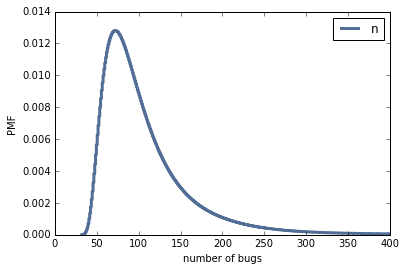

In [5]:
n_marginal = suite.Marginal(0)
thinkplot.Pmf(n_marginal, label='n')
thinkplot.Config(xlabel='number of bugs',
                   ylabel='PMF')

Given that that 32 original bugs were found, the lower bound for the number of bugs cannot be below 32. The upper bound was set by trial and error to show most of the distribution (a small amount of data gets cut off by the graph). 

In [6]:
print('posterior mean of n', n_marginal.Mean())
print('MAP of n', n_marginal.MAP())

posterior mean of n 106.459961237
MAP of n 72


The likelihood that produces a maxima is 72, and the mean is 106. These numbers are consistent with the estimate of the Lincoln index, suggesting both ways of estimating bugs may be reasonable.

## Original Problem

From DASL(http://lib.stat.cmu.edu/DASL/Datafiles/Hotdogs.html)

The data file has the calories and salt content of 54 types of hotdogs as well as the main source of protein: beef, poultry, and meat. If I went to the store wanting a healthy hot dog, which type of protein should I select?

I will use Pandas to load the data.




In [18]:
import pandas as pd

df = pd.read_csv('hotdog.csv', delimiter='\t')
df.head()

,Type,Calories,Sodium
0,Beef,186,495
1,Beef,181,477
2,Beef,176,425
3,Beef,149,322
4,Beef,184,482


I will then compute the mean value calories and sodium in the group.

In [26]:
df.groupby('Type').mean()

,Calories,Sodium
Type,,
Beef,156.850000,401.150000
Meat,158.705882,418.529412
Poultry,118.764706,459.000000


In [28]:
groupedCal = df.groupby('Type')
for name, cal in groupedCal:
    print (name, cal.Calories.mean())

Beef 156.85
Meat 158.705882353
Poultry 118.764705882


In [29]:
groupedSod = df.groupby('Type')
for name, sod in groupedSod:
    print (name, sod.Sodium.mean())

Beef 401.15
Meat 418.529411765
Poultry 459.0


I will use a normal distribution to describe my data, and create a likelihood function.

In [30]:
from scipy.stats import norm

class Normal(Suite, Joint):
    
    def Likelihood(self, data, hypo):
        """
        
        data: calories or salt content
        hypo: mu, sigma
        """
        mu, sigma = hypo
        likes = norm.pdf(data, mu, sigma)
        return np.prod(likes)

I will assume that my prior distributions for both mu and sigma are uniform.

In [38]:
musC = np.linspace(100, 200, 201)
sigmasC = np.linspace(2, 60, 201)


Next I will go through all of the pairings of mu and sigma.

In [45]:
from itertools import product

beefC = Normal(product(musC, sigmasC), label = 'Beef Calories')
dataBC = df[df.Type=='Beef'].Calories
beefC.Update(dataBC)

1.3047282475800567e-41

I can visualize this data using a contour plot, which maps my mus to my sigmas. The first contour represents the beef hotdogs, the secound one meat, and the third poultry.

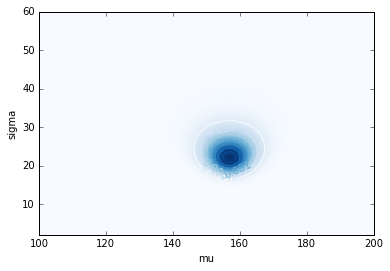

In [46]:
thinkplot.Contour(beefC, pcolor=True)
thinkplot.Config(xlabel='mu', ylabel='sigma')

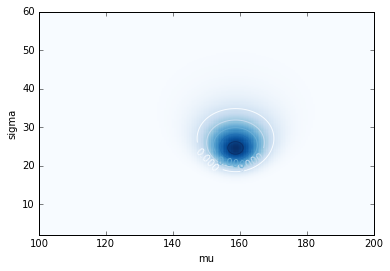

In [44]:
meatC = Normal(product(musC, sigmasC), label = 'Meat Calories')
dataMC = df[df.Type=='Meat'].Calories
meatC.Update(dataMC)

thinkplot.Contour(meatC, pcolor=True)
thinkplot.Config(xlabel='mu', ylabel='sigma')

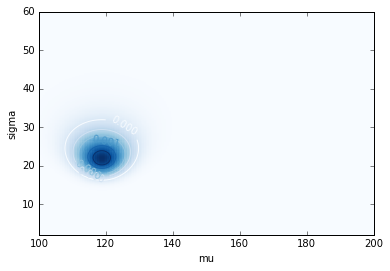

In [43]:
poultryC = Normal(product(musC, sigmasC), label='Poultry Calories')
dataPC = df[df.Type=='Poultry'].Calories
poultryC.Update(dataPC)

thinkplot.Contour(poultryC, pcolor=True)
thinkplot.Config(xlabel='mu', ylabel='sigma')

We can then get the marginal distribution of mu, which tells us about the mean of the data.

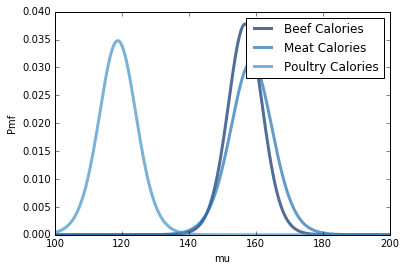

In [51]:
pmf_mu_beef_c = beefC.Marginal(0)
pmf_mu_meat_c = meatC.Marginal(0)
pmf_mu_poultry_c = poultryC.Marginal(0)

thinkplot.Pdf(pmf_mu_beef_c, label = 'Beef Calories')
thinkplot.Pdf(pmf_mu_meat_c, label = 'Meat Calories')
thinkplot.Pdf(pmf_mu_poultry_c, label = 'Poultry Calories')
thinkplot.Config(xlabel='mu', ylabel='Pmf')

We can also get the marginal distribution of sigma, which tells us about the standardard deviation. 

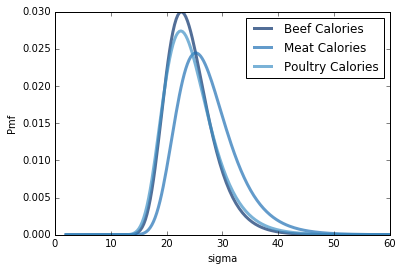

In [78]:
pmf_sigma_beef_c = beefC.Marginal(1)
pmf_sigma_meat_c = meatC.Marginal(1)
pmf_sigma_poultry_c = poultryC.Marginal(1)

thinkplot.Pdf(pmf_sigma_beef_c, label = 'Beef Calories')
thinkplot.Pdf(pmf_sigma_meat_c, label = 'Meat Calories')
thinkplot.Pdf(pmf_sigma_poultry_c, label = 'Poultry Calories')
thinkplot.Config(xlabel='sigma', ylabel='Pmf')

Next we can compute if the probability that mu of the poultry is less than the other two types of protein. We will also look at the probability that mu of the meat is greater than mu of the beef.
We will first do the probability that mu of the beef is greater than mu of the poultry.

In [56]:
pmf_mu_beef_c.ProbGreater(pmf_mu_poultry_c)


0.99997424612552732

Then we will see the probability of mu of the meat being greater than mu of the poutlry.

In [57]:
pmf_mu_meat_c.ProbGreater(pmf_mu_poultry_c)


0.99994332303324551

And finally we will see if the probability of mu of the meat being greater than mu of the beef.

In [58]:
pmf_mu_meat_c.ProbGreater(pmf_mu_beef_c)

0.57491899264728341

We can also compare standard deviations using sigmas. We will do it in the same order as we did when comparing the mus.

In [59]:
pmf_sigma_beef_c.ProbGreater(pmf_sigma_poultry_c)

0.48302227550698357

In [60]:
pmf_sigma_meat_c.ProbGreater(pmf_sigma_poultry_c)

0.65844773328102646

In [61]:
pmf_sigma_meat_c.ProbGreater(pmf_sigma_beef_c)

0.67203895548287129

This shows that there is a very high probability of poultry having the fewest mean Calories per hotdog. The meat to beef comparison is much closer with meat having a probability of .57 of having a mean greater than the mean of beef.

The sigmas are much closer. While all of the sigmas are similar it appears meat has the highest variation, followed by poultry, then beef, which is to say that the Calories in different individual beef hotdogs are more similar than the Calories in either of the other types. Still it appears that selecting a poultry hotdog with have the fewest Calories. 

Let's now look sodium values.Once again I will create an uniform distribution of mus and sigmas as well as use my nonrmal class to model the data.

In [70]:
musS = np.linspace(300, 550, 101)
sigmasS = np.linspace(20, 200, 101)

Then I will go through all pairs of mu and sigma of type Beef Sodium and create a contour plot.

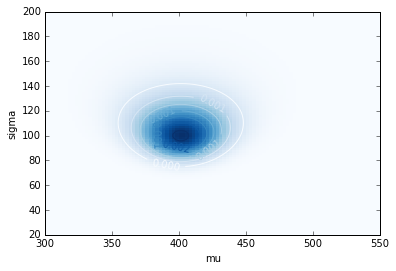

In [71]:
beefS = Normal(product(musS, sigmasS), label = 'Beef Sodium')
dataBS = df[df.Type=='Beef'].Sodium
beefS.Update(dataBS)

thinkplot.Contour(beefS, pcolor=True)
thinkplot.Config(xlabel='mu', ylabel='sigma')

I will do the same for meat.

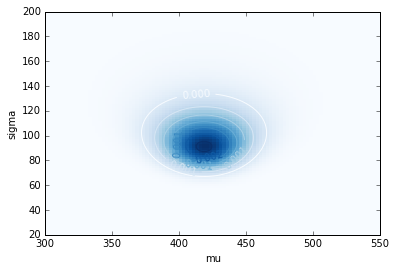

In [72]:
meatS = Normal(product(musS, sigmasS), label = 'Meat Sodium')
dataMS = df[df.Type=='Meat'].Sodium
meatS.Update(dataMS)

thinkplot.Contour(meatS, pcolor=True)
thinkplot.Config(xlabel='mu', ylabel='sigma')

Lastly I will look at the mu and sigma distributions for poultry.

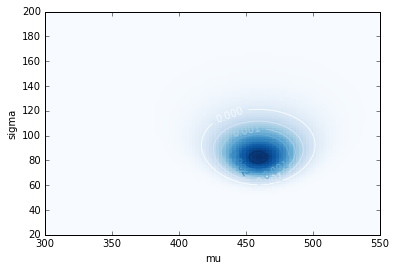

In [73]:
poultryS = Normal(product(musS, sigmasS), label = 'Poultry Sodium')
dataPS = df[df.Type=='Poultry'].Sodium
poultryS.Update(dataPS)

thinkplot.Contour(poultryS, pcolor=True)
thinkplot.Config(xlabel='mu', ylabel='sigma')

To compare let's the data sets let's get the marginal distributions of the mus, just like before. 

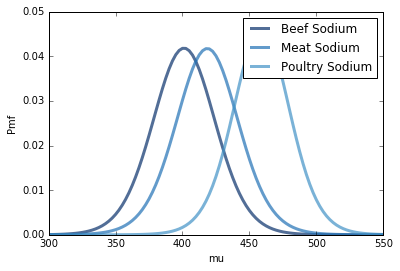

In [74]:
pmf_mu_beef_s = beefS.Marginal(0)
pmf_mu_meat_s = meatS.Marginal(0)
pmf_mu_poultry_s = poultryS.Marginal(0)

thinkplot.Pdf(pmf_mu_beef_s, label = 'Beef Sodium')
thinkplot.Pdf(pmf_mu_meat_s, label = 'Meat Sodium')
thinkplot.Pdf(pmf_mu_poultry_s, label = 'Poultry Sodium')
thinkplot.Config(xlabel='mu', ylabel='Pmf')

Now we can get the marginal distributions of sigma. 

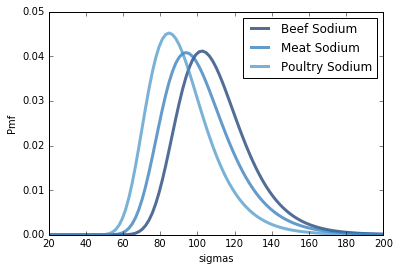

In [77]:
pmf_sigma_beef_s = beefS.Marginal(1)
pmf_sigma_meat_s = meatS.Marginal(1)
pmf_sigma_poultry_s = poultryS.Marginal(1)

thinkplot.Pdf(pmf_sigma_beef_s, label = 'Beef Sodium')
thinkplot.Pdf(pmf_sigma_meat_s, label = 'Meat Sodium')
thinkplot.Pdf(pmf_sigma_poultry_s, label = 'Poultry Sodium')
thinkplot.Config(xlabel='sigmas', ylabel='Pmf')

Once more we will compare the probability of the means of the data being unequal. I will do these in the same order as above so first I will compare beef to poultry.

In [79]:
pmf_mu_beef_s.ProbGreater(pmf_mu_poultry_s)

0.040029567283664087

Then meat to poultry.

In [80]:
pmf_mu_meat_s.ProbGreater(pmf_mu_poultry_s)

0.10638797608219148

And lastly meat to beef.

In [81]:
pmf_mu_meat_s.ProbGreater(pmf_mu_beef_s)

0.67947533398641835

We can also compare standard deviations using sigmas. We will do it in the same order as we did when comparing the mus.

In [82]:
pmf_sigma_beef_s.ProbGreater(pmf_sigma_poultry_s)

0.75116589792464539

In [83]:
pmf_sigma_meat_s.ProbGreater(pmf_sigma_poultry_s)

0.63785147276533327

In [84]:
pmf_sigma_meat_s.ProbGreater(pmf_sigma_beef_s)

0.36454261933950927

This shows there is a high probability that the mean of the sodium content of the poultry of is the highest. There is a higher probability that the mean of sodium content of the meat is greater than the sodium content of the beef. The variance seems to be highest for the beef, with the second highest variance for the meat and the least variance for the poultry, showing the poultry sodium values are consistently high. 

It is interesting that the hotdog with the lowest mean in Calories had the highest mean in sodium (poultry). Beef on the other hand had was in the middle, but very similar to Meat, in terms of probability of highest mean Calories, but had the lowest probability of having the highest mean sodium content. Meat, had the highest probability of the highest mean Calories, and was in the middle for highest mean sodium content.

## GPS Problem

This problem was written by Allen Downey.

According to [Wikipedia]()

￼
> GPS included a (currently disabled) feature called Selective Availability (SA) that adds intentional, time varying errors of up to 100 meters (328 ft) to the publicly available navigation signals. This was intended to deny an enemy the use of civilian GPS receivers for precision weapon guidance.
> [...]
> Before it was turned off on May 2, 2000, typical SA errors were about 50 m (164 ft) horizontally and about 100 m (328 ft) vertically.[10] Because SA affects every GPS receiver in a given area almost equally, a fixed station with an accurately known position can measure the SA error values and transmit them to the local GPS receivers so they may correct their position fixes. This is called Differential GPS or DGPS. DGPS also corrects for several other important sources of GPS errors, particularly ionospheric delay, so it continues to be widely used even though SA has been turned off. The ineffectiveness of SA in the face of widely available DGPS was a common argument for turning off SA, and this was finally done by order of President Clinton in 2000.

Suppose it is 1 May 2000, and you are standing in a field that is 200m square.  You are holding a GPS unit that indicates that your location is 51m north and 15m west of a known reference point in the middle of the field.

However, you know that each of these coordinates has been perturbed by a "feature" that adds random errors with mean 0 and standard deviation 30m.

1) After taking one measurement, what should you believe about your position?

Note: Since the intentional errors are independent, you could solve this problem independently for X and Y.  But we'll treat it as a two-dimensional problem, partly for practice and partly to see how we could extend the solution to handle dependent errors.

You can start with the code in gps.py.

2) Suppose that after one second the GPS updates your position and reports coordinates (48, 90).  What should you believe now?

3) Suppose you take 8 more measurements and get:

    (11.903060613102866, 19.79168669735705)
    (77.10743601503178, 39.87062906535289)
    (80.16596823095534, -12.797927542984425)
    (67.38157493119053, 83.52841028148538)
    (89.43965206875271, 20.52141889230797)
    (58.794021026248245, 30.23054016065644)
    (2.5844401241265302, 51.012041625783766)
    (45.58108994142448, 3.5718287379754585)

At this point, how certain are you about your location?



First we want to create a class that evaluates the likelihood of your location. It takes in data from the GPS and knows the standard deviation of this data. 

In [3]:
class Gps(Suite, Joint):
    
    def Likelihood(self, data, hypo):
        std = 30
        x, y = data
        meanx, meany = hypo
        like = EvalNormalPdf(x,meanx, std)*EvalNormalPdf(y,meany, std)
        return like

We can set up a space that represents the field you are on with the origin being at the center of the field. Then we can update our location and see the probability of being at different locations on the field.

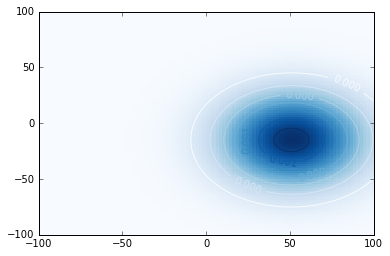

In [4]:
# Solution goes here
from itertools import product

x_y_loc = np.linspace(-100, 100, 101)
grid = Gps(product(x_y_loc, x_y_loc))
grid.Update((51, -15))

thinkplot.Contour(grid, pcolor =True)

Now we have another reading of (48, 90), so we can update our location once again. 

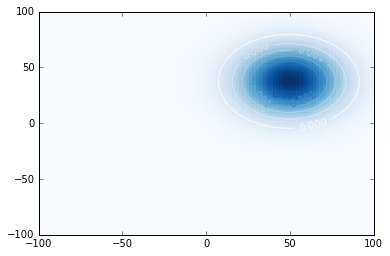

In [5]:
grid.Update((48,90))
thinkplot.Contour(grid, pcolor =True)

We notice that our assumed position has shifted based on the new reading and the contour has gotten smaller. By adding more data the contour should shrink again as we become more confident in our location. Let's try it. 

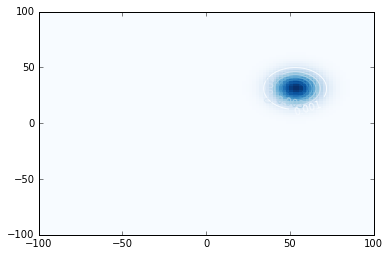

In [6]:
grid.Update((11.903060613102866, 19.79168669735705))
grid.Update((77.10743601503178, 39.87062906535289))
grid.Update((80.16596823095534, -12.797927542984425))
grid.Update((67.38157493119053, 83.52841028148538))
grid.Update((89.43965206875271, 20.52141889230797))
grid.Update((58.794021026248245, 30.23054016065644))
grid.Update((2.5844401241265302, 51.012041625783766))
grid.Update((45.58108994142448, 3.5718287379754585))

thinkplot.Contour(grid, pcolor =True)

Now we have a much smaller area that we are likely to be in. To see how confident we are we can look at the marginal distributions.

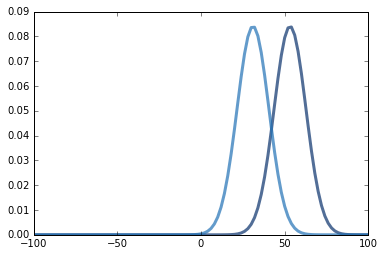

In [7]:
marginal_x = grid.Marginal(0)
marginal_y = grid.Marginal(1)
thinkplot.Pdf(marginal_x, label = 'posterior distributio x')
thinkplot.Pdf(marginal_y, label = 'posterior distribution y')

In [8]:
print(marginal_x.Mean(), marginal_x.Std())
print(marginal_y.Mean(), marginal_y.Std())

53.1957132094 9.48680494799
31.0728627918 9.48683298048


This tells us that the mean location for the x coordinate is at 53.20m with a standard deviation of 9.49 and the mean location of the y coordinate is 31.07m with a standar deviation of 9.49m. This means we should be in the upper right quadrant and we should be within 10m of the estimated position.

## Project

For my project I will be working with Daniel. We are working on survival analysis. We are not entirely sure what we will use the survival analysis for but right now we are just looking at its implementation.